In [ ]:
'''
@author: Chandan Radhakrishna
Purpose: Retrieve 20 newsgroup data and classify them
'''

In [381]:
from os import listdir
import os
import string
import pandas as pd
import numpy as np
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from string import punctuation
import nltk
import re
from sklearn.model_selection import train_test_split
from nltk.tokenize import word_tokenize
import string
from sklearn.feature_extraction.text import CountVectorizer

In [10]:
my_path = "20_newsgroups"
folders = [f for f in listdir(my_path)]
folders

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [11]:
data={}
for folder in folders:
    data[folder]=[]
    for file in os.listdir(os.path.join(my_path,folder)):
        with open(os.path.join(my_path,folder,file),encoding='latin-1') as opened_file:
            data[folder].append(opened_file.read())

In [479]:
orig_df = pd.DataFrame.from_dict(data, orient='index')
orig_df = orig_df.T
orig_df

,alt.atheism,comp.graphics,comp.os.ms-windows.misc,comp.sys.ibm.pc.hardware,comp.sys.mac.hardware,comp.windows.x,misc.forsale,rec.autos,rec.motorcycles,rec.sport.baseball,rec.sport.hockey,sci.crypt,sci.electronics,sci.med,sci.space,soc.religion.christian,talk.politics.guns,talk.politics.mideast,talk.politics.misc,talk.religion.misc
0,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49...,Xref: cantaloupe.srv.cs.cmu.edu comp.graphics:...,Xref: cantaloupe.srv.cs.cmu.edu comp.archives....,Xref: cantaloupe.srv.cs.cmu.edu comp.sys.ibm.p...,Xref: cantaloupe.srv.cs.cmu.edu comp.sys.mac.m...,Xref: cantaloupe.srv.cs.cmu.edu comp.lang.c:65...,Path: cantaloupe.srv.cs.cmu.edu!rochester!udel...,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,Path: cantaloupe.srv.cs.cmu.edu!rochester!udel...,Newsgroups: rec.sport.hockey\nPath: cantaloupe...,Xref: cantaloupe.srv.cs.cmu.edu alt.security.r...,Newsgroups: sci.electronics\nPath: cantaloupe....,Newsgroups: sci.med\nPath: cantaloupe.srv.cs.c...,Xref: cantaloupe.srv.cs.cmu.edu sci.space:5949...,Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv....,Xref: cantaloupe.srv.cs.cmu.edu misc.headlines...,Newsgroups: talk.politics.mideast\nPath: canta...,Xref: cantaloupe.srv.cs.cmu.edu alt.news-media...,Newsgroups: talk.religion.misc\nPath: cantalou...
1,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv....,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,Xref: cantaloupe.srv.cs.cmu.edu comp.lang.c:65...,Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv....,Newsgroups: rec.autos\nPath: cantaloupe.srv.cs...,Xref: cantaloupe.srv.cs.cmu.edu rec.motorcycle...,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,Newsgroups: rec.sport.hockey\nPath: cantaloupe...,Xref: cantaloupe.srv.cs.cmu.edu alt.security.r...,Xref: cantaloupe.srv.cs.cmu.edu rec.radio.swap...,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,Xref: cantaloupe.srv.cs.cmu.edu sci.astro:3390...,Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv....,Xref: cantaloupe.srv.cs.cmu.edu misc.headlines...,Xref: cantaloupe.srv.cs.cmu.edu alt.folklore.u...,Xref: cantaloupe.srv.cs.cmu.edu talk.politics....,Newsgroups: talk.religion.misc\nPath: cantalou...
2,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,Xref: cantaloupe.srv.cs.cmu.edu comp.windows.x...,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,Xref: cantaloupe.srv.cs.cmu.edu rec.autos:1015...,Newsgroups: rec.motorcycles\nPath: cantaloupe....,Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv....,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,Xref: cantaloupe.srv.cs.cmu.edu alt.security.r...,Newsgroups: sci.electronics\nPath: cantaloupe....,Xref: cantaloupe.srv.cs.cmu.edu rec.nude:15823...,Xref: cantaloupe.srv.cs.cmu.edu sci.space:5984...,Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv....,Xref: cantaloupe.srv.cs.cmu.edu misc.headlines...,Xref: cantaloupe.srv.cs.cmu.edu talk.politics....,Xref: cantaloupe.srv.cs.cmu.edu alt.conspiracy...,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...
3,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,Xref: cantaloupe.srv.cs.cmu.edu comp.human-fac...,Newsgroups: comp.os.ms-windows.misc\nPath: can...,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,Xref: cantaloupe.srv.cs.cmu.edu comp.sys.mac.h...,Xref: cantaloupe.srv.cs.cmu.edu comp.windows.x...,Newsgroups: misc.forsale\nPath: cantaloupe.srv...,Xref: cantaloupe.srv.cs.cmu.edu rec.autos:1015...,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv....,Newsgroups: sci.electronics\nPath: cantaloupe....,Xref: ca

In [480]:
new_df = pd.DataFrame()
new_df

""


In [482]:
#Converting the previous dataframe 
for folder in folders:
    series_data = orig_df[folder]
    frame = { 'Articles': series_data,'News_group': folder } 
    result = pd.DataFrame(frame)
    new_df = new_df.append(result)
new_df

,Articles,News_group
0,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49...,alt.atheism
1,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism
2,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
3,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism
...,...,...
995,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:54...,talk.religion.misc
996,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:54...,talk.religion.misc
997,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc
998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc


In [518]:
new_index =[i for i in range(20000)]
new_df.index = new_index

In [519]:
stopWords=stopwords.words('english')
stopWords+=punctuation
stopWords+=['subject','from', 'date', 'newsgroups','usenetinscwruedu', 'message-id', 'lines', 'path', 'organization', 
            'would','apr','gmt' 'writes', 'references','said', 'article', 'sender', 'nntppostinghost', 'people', 
            'university', 'think', 'xref', 'alt','spoolmuedu','ÿ','aap','pipex','ibmpcug', 'could', 'distribution','crabapplesrvcscmuedu', 'first', 
            'anyone','world', 'really', 'since','ÿ', 'right', 'believe','cantaloupe.srv.cs.cmu.edu','ffrf' ,'still','max','ax','also','nocnearnet','cisohiostateedu','magnusacsohiostateedu','newsseicmuedu','like','a','b','c'
           'd','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z','tue','gmt','br','aah','az','gmt']

In [520]:
#Pre-processing 
def Perform_preprocess(sentence):
    tokens = word_tokenize(sentence)
        
# convert to lower case
    tokens = [w.lower() for w in tokens]
        
        
# remove remaining tokens that are not alphabetic
    words = [word for word in tokens if word.isalpha()]
        
# filter out stop words
    words = [w for w in words if not w in stopWords]
    
    return words

In [521]:
new_X = pd.DataFrame()

In [522]:
word={}
for i in range(len(new_index)):
    word[i]=[]
    if(isinstance(X[i], str)):
        word[i].append(Perform_preprocess(X[i]))
        frame = { 'Articles': X[i],'Words': word[i],'News_label':y[i] } 
        result = pd.DataFrame(frame)
        new_X = new_X.append(result)
    else:
        continue  


In [546]:
#Adding new column in the dataframe with the pre-processed words
new_X  

,Articles,Words,News_label
0,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49...,"[agate, uunet, mantis, mathew, mathew, mathew,...",alt.atheism
1,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,"[agate, netsys, mantis, mathew, mathew, mathew...",alt.atheism
2,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,"[usc, tubsibr, benedikt, rosenau, gospel, dati...",alt.atheism
3,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,"[wupost, uunet, mantis, news, mathew, mathew, ...",alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,"[wupost, uunet, watson, strom, strom, rob, str...",alt.atheism
...,...,...,...
19992,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:54...,"[utnut, torn, gmills, gmills, phil, trodwell, ...",talk.religion.misc
19993,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:54...,"[imager, dk, dk, imager, dave, knapp, branch, ...",talk.religion.misc
19994,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,"[usc, uunet, quack, pharvey, pharvey, paul, ha...",talk.religion.misc
19995,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,"[psuvm, cunyvm, kevxu, city, new, york, tuesda...",talk.religion.misc


In [524]:
new_index =[i for i in range(19997)]
new_X.index = new_index

In [715]:
#Converting the list into string
words_list = ' '
for i in range(19997):
    if(new_X.News_label[i]=="comp.graphics"):
        for n_words in new_X.Words[i]:
            words_list = words_list + ' '+ str(n_words)
    else:
        continue
len(words_list)

943559

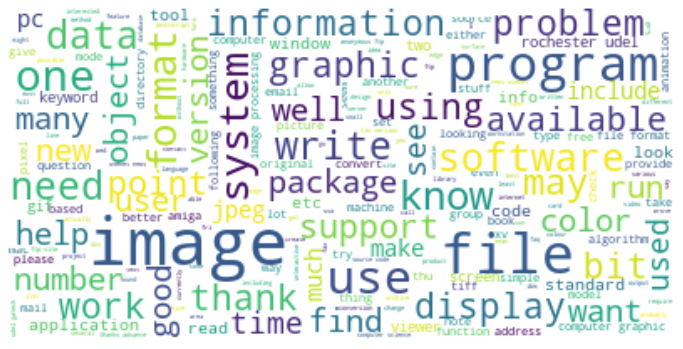

In [549]:
# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=40,background_color='white').generate(words_list)
fig = plt.figure(1, figsize=(12, 12))
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [553]:
#Dividing the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(new_X.iloc[:,:-1], new_X.iloc[:,-1:], test_size=0.3)

In [663]:
X_train

,Articles,Words
19461,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,"[uunet, ekr, eric, rescorla, years, say, chris..."
13339,Newsgroups: sci.med\nPath: cantaloupe.srv.cs.c...,"[agate, uknet, sunic, liuida, davpa, davpa, da..."
5097,Xref: cantaloupe.srv.cs.cmu.edu comp.windows.x...,"[derrick, brashear, mouseless, operation, ol, ..."
4569,Xref: cantaloupe.srv.cs.cmu.edu comp.sys.mac.h...,"[rochester, udel, uunet, news, glalonde, cache..."
6999,Xref: cantaloupe.srv.cs.cmu.edu comp.sys.ibm.p...,"[ub, csn, iplmail, artc, artc, art, brand, new..."
...,...,...
14056,Newsgroups: sci.space\nPath: cantaloupe.srv.cs...,"[flb, flb, tm, area, rule, forwarded, space, d..."
1241,Newsgroups: comp.graphics\nPath: cantaloupe.sr...,"[agate, ames, wetware, psinntp, cavalier, cava..."
11214,Newsgroups: sci.crypt\nPath: cantaloupe.srv.cs...,"[usc, mvanheyn, marc, vanheyningen, mvanheyn, ..."
6477,Xref: cantaloupe.srv.cs.cmu.edu misc.wanted:31...,"[linac, att, cbnewse, rwrona, rwrona, townhous..."


In [601]:
y_train.News_label[65]

'alt.atheism'

In [555]:
y_train

,News_label
19461,talk.religion.misc
13339,sci.med
5097,comp.windows.x
4569,comp.sys.mac.hardware
6999,misc.forsale
...,...
14056,sci.space
1241,comp.graphics
11214,sci.crypt
6477,misc.forsale


In [674]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(analyzer='word',tokenizer=lambda x: x,
                        preprocessor=lambda x: x,use_idf=True,token_pattern=None)

In [675]:
X_train_tfidf = tfidf.fit_transform(X_train.Words)
X_train_tfidf.shape

(13997, 81423)

In [687]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train_tfidf, y_train.News_label)

In [688]:

docs_new = [ 'chip','article']

X_new_tfidf = tfidf.transform([docs_new])

predicted = clf.predict(X_new_tfidf)


In [689]:
predicted

array(['sci.crypt'], dtype='<U24')

In [690]:
#Test prediction
X_new_tfidf = tfidf.transform(X_test.Words)

predicted = clf.predict(X_new_tfidf)

In [691]:
predicted

array(['soc.religion.christian', 'alt.atheism',
       'comp.sys.ibm.pc.hardware', ..., 'sci.electronics',
       'rec.sport.baseball', 'misc.forsale'], dtype='<U24')

In [692]:
y_test

,News_label
15387,soc.religion.christian
471,alt.atheism
3616,comp.sys.ibm.pc.hardware
4546,comp.sys.mac.hardware
8206,rec.motorcycles
...,...
14798,sci.space
10511,rec.sport.hockey
12278,sci.electronics
9100,rec.sport.baseball


In [693]:
#Accuracy with the test score
np.mean(predicted == y_test.News_label)
    

0.8638333333333333

In [697]:
#Evaluation-Metrics
from sklearn import metrics
print(metrics.classification_report(y_test.News_label, predicted,target_names=folders))

                          precision    recall  f1-score   support

             alt.atheism       0.76      0.78      0.77       331
           comp.graphics       0.78      0.79      0.79       285
 comp.os.ms-windows.misc       0.81      0.83      0.82       290
comp.sys.ibm.pc.hardware       0.74      0.83      0.78       303
   comp.sys.mac.hardware       0.86      0.89      0.87       280
          comp.windows.x       0.90      0.85      0.87       284
            misc.forsale       0.89      0.74      0.81       292
               rec.autos       0.93      0.92      0.92       301
         rec.motorcycles       0.95      0.97      0.96       296
      rec.sport.baseball       0.95      0.97      0.96       298
        rec.sport.hockey       0.97      0.97      0.97       298
               sci.crypt       0.91      0.95      0.93       328
         sci.electronics       0.87      0.84      0.86       283
                 sci.med       0.98      0.90      0.94       304
         

In [711]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(analyzer='word',tokenizer=lambda x: x,
                        preprocessor=lambda x: x,use_idf=True,token_pattern=None)

In [712]:
X_train_tfidf = tfidf.fit_transform(X_train.Words)
X_train_tfidf.shape

(13997, 81423)

In [713]:
# print idf values
df_idf = pd.DataFrame(tfidf.idf_, index=tfidf.get_feature_names(),columns=["idf_weights"])
 
# sort ascending
df_idf.sort_values(by=['idf_weights'])

,idf_weights
writes,1.645439
news,1.967629
one,1.974231
know,2.223547
get,2.325460
...,...
kjrpkhf,9.853523
kjw,9.853523
kjzlah,9.853523
knucklehead,9.853523


In [ ]:
References:
1.	https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60
2.	https://www.geeksforgeeks.org/generating-word-cloud-python/
3.	https://kavita-ganesan.com/tfidftransformer-tfidfvectorizer-usage-differences/#.XpvzucgzbIV
4.	https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html
